In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [3]:
data=pd.read_excel('ground_water.xls')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [81]:
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


### EDA

In [5]:
data.isnull().sum()

X    0
Y    0
dtype: int64

<AxesSubplot:xlabel='X'>

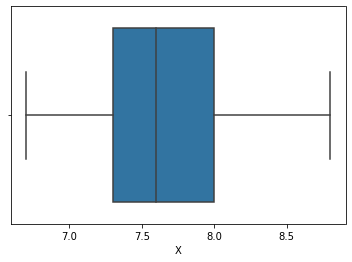

In [8]:
sns.boxplot(data['X'])

<AxesSubplot:xlabel='Y'>

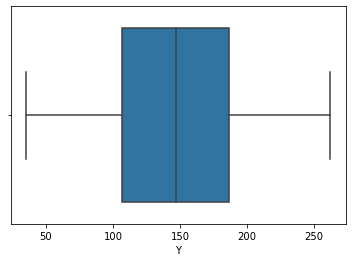

In [9]:
sns.boxplot(data['Y'])

There are no missing values and outliers
#### Normalization

In [72]:
def normalize(d):
    min_d=min(d)
    max_d=max(d)
    result=[]
    diff=max_d-min_d
    for i in d:
        result.append((i-min_d)/diff)
    return result
        

In [20]:
x=normalize(data['X'])
y=normalize(data['Y'])
l=0.1

## Stochastic gradient descent

In [21]:
def y_value(m,c,x):
    return m*x+c

In [22]:
def error(y_actual,y_predicted):
    return 0.5*(y_actual-y_predicted)**2

In [23]:
def gradient(m,c,y_actual,y_predicted,x):
    g_m=(y_actual-y_predicted)*(-1)*x
    g_c=(y_actual-y_predicted)*(-1)
    m=m-l*g_m
    c=c-l*g_c
    return m,c

In [29]:
def linear_regression(ph,co3):
    m=1;
    c=-1
    e_list=[]
    count=0
    while True:
        for x,y in zip(ph,co3):
            y_predicted=y_value(m,c,x)
            y_actual=y
            e=error(y_actual,y_predicted)
            m,c=gradient(m,c,y_actual,y_predicted,x)
            e_list.append(e)
        count+=1
        if count>10:
            break
    return m,c,e_list

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

### Train data

In [52]:
m_train,c_train,e_list_train=linear_regression(x_train,y_train)

In [53]:
m_train

0.008496993178326516

In [54]:
c_train

0.46302250801094497

error plot

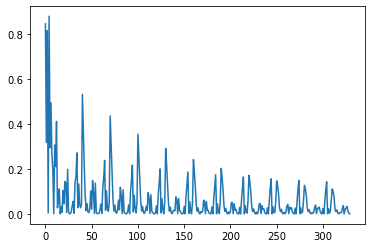

In [55]:
plt.plot(range(len(e_list_train)),e_list_train)

In [63]:
def final_error(m,c):
    mse=0
    mae=0
    for x,y in zip(data['X'],data['Y']):
        y_predicted=y_value(m,c,x)
        y_actual=y
        d=y_actual-y_predicted
        mse+=d*d
        mae+=d
    return 0.5*mae,0.5*mse,math.sqrt(0.5*mse)

In [64]:
mae,mse,rmse=final_error(m_train,c_train)

print("MAE of trained data is "+str(mae))
print("MSE of trained data is "+str(mse))
print("RMSE of trained data is "+str(rmse))

MAE of trained data is 2418.521884002337
MSE of trained data is 395427.8610908131
RMSE of trained data is 628.8305503796814


### testing data

In [65]:
m_test,c_test,e_list_test=linear_regression(x_test,y_test)

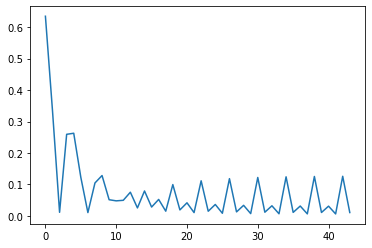

In [66]:
plt.plot(range(len(e_list_test)),e_list_test)

In [67]:
mae,mse,rmse=final_error(m_test,c_test)

print("MAE of test data is "+str(mae))
print("MSE of test data is "+str(mse))
print("RMSE of test data is "+str(rmse))

MAE of test data is 2253.3391162139083
MSE of test data is 350473.13391302753
RMSE of test data is 592.007714403307


### predicting with trained data

In [79]:
def predict(x):
    min_d=min(data['X'])
    max_d=max(data['X'])
    diff=max_d-min_d
    x=(x-min_d)/diff
    y=y_value(m_train,c_train,x)
    y=(y*(max(data['Y'])-min(data['Y'])))+min(data['Y'])
    return y

In [82]:
predict(7)

140.38165466869594

In [83]:
predict(8.1)

141.39198761947125